<a href="https://colab.research.google.com/github/victoriaprestes/CaseXVendas/blob/main/AnaliseRentabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O case apresenta o seguinte questionamento:

"No último ano, o XVendas apresentou perda gradual na rentabilidade. Sabe-se que o volume de vendas permaneceu estável durante o período. O que pode ser a causa desse comportamento?"

Para chegar à resposta dessa pergunta, irei seguir três passos:
1. Análise e limpeza dos dados (se necessário);
2. Visualização da distribuição dos gastos ao longo dos meses;
3. Correlação de Variáveis (Relacionamentos);




# Análise e Limpeza dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/CASES/Case_Vaga_Analista_Intelligence_1.xlsx')
case_df = data.copy()
case_df.head()

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
0,1,AC AUDIO,80353.50458,36247.578746,11352.354514
1,1,AC BT SPEAKER,45448.46538,82168.278219,19423.724235
2,1,AC CALCULADORA,2253.74290,3309.124869,813.303043
3,1,AC CELULARES,22829.13170,18308.656441,5471.035672
4,1,AC ELETRODOMESTICO,432.07736,76.286501,33.111653


### Formato dos dados

In [ ]:
print('total de linhas:', case_df.shape[0])
print('total de colunas:', case_df.shape[1])

total de linhas: 3521
total de colunas: 5


### Valores nulos e tipo de variáveis

In [ ]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mês                 3521 non-null   int64  
 1   Categoria           3521 non-null   object 
 2   Custo Entrega       3521 non-null   float64
 3   Custo dos Produtos  3521 non-null   float64
 4   Custo Marketing     3521 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 137.7+ KB


In [ ]:
case_df.describe()

,Mês,Custo Entrega,Custo dos Produtos,Custo Marketing
count,3521.000000,3.521000e+03,3.521000e+03,3.521000e+03
mean,4.980403,3.031283e+05,1.361742e+06,2.920965e+05
std,2.582263,3.108082e+06,1.461941e+07,2.959444e+06
min,1.000000,0.000000e+00,2.331519e-01,6.816765e-02
25%,3.000000,4.387751e+03,1.631838e+03,4.735437e+02
50%,5.000000,2.984134e+04,1.412240e+04,3.866200e+03
75%,7.000000,1.449348e+05,9.337045e+04,2.539583e+04
max,9.000000,1.579374e+08,4.170808e+08,9.791486e+07


# Visualização de gastos por mês


In [ ]:
# Criando tabela com a soma total de custos por mês
freq_entrega = case_df.groupby('Mês')['Custo Entrega'].sum()
freq_prod = case_df.groupby('Mês')['Custo dos Produtos'].sum()
freq_marketing = case_df.groupby('Mês')['Custo Marketing'].sum()
freq_total = pd.DataFrame({'Custo Entrega': freq_entrega, 'Custo Produto': freq_prod, 'Custo Marketing': freq_marketing})

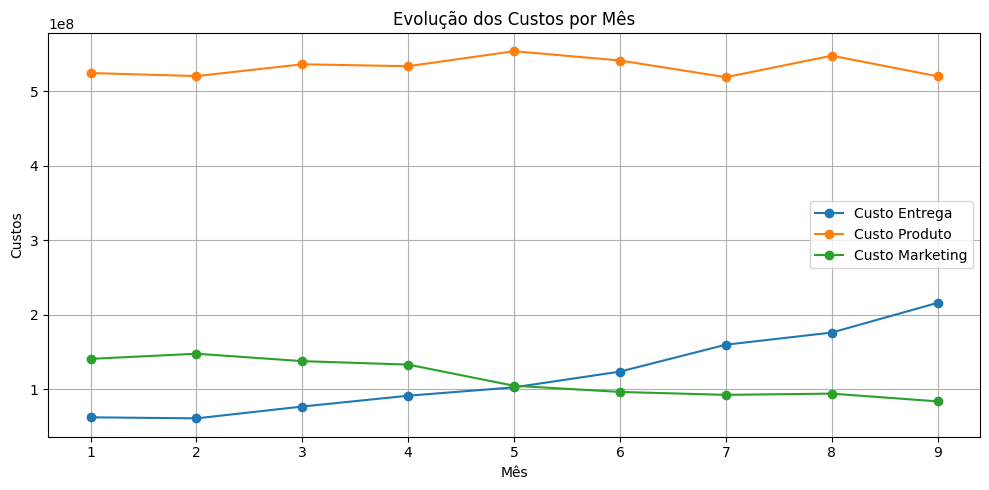

In [ ]:
freq_total.plot(kind='line', marker='o', figsize=(10, 5))
plt.xlabel('Mês')
plt.ylabel('Custos')
plt.title('Evolução dos Custos por Mês')
plt.grid(True)
plt.tight_layout()

plt.show()

**Pelo gráfico algumas coisas ficam claras:**

* Embora os custos com o Produto sejam de longe o maior, os mesmos se manteram consistentes durante os meses;
* Os custos com marketing sofreram uma queda constante, com a maior sendo no mês de Maio;
* Em contrapartida, os custos com entregas aumentaram consideravelmente a partir desse mesmo mês, como indicado pela intesecção das duas linhas no ponto 5.

Considerando que o volume de vendas se manteve estável, percebe-se que aumento dos custos com entrega é o fator de maior impacto negativo na rentabilidade. Estes custos podem ser derivados de algumas variáveis, entre elas:

1. **Valor de combustível:** O combustível afeta diretamente no valor de frete. Aqui cabe explorar sobre a situação econômica do país nos últimos meses; houve um aumento no valor do dólar? foram feitas greves?
2. **Logística:** Caso a logística seja terceirizada, pode ter tido um aumento no valor cobrado por estas empresas; se a logística for interna, existem *n* fatores que podem contribuir para isto, como rotas mal planejadas, eficiência baixa, mau gerenciamento, veículos danificados, etc. Isso pode ser remediado com uma melhora no planejamento, focando em rotas mais curtas e diretas, garagens da frota em locais estratégicos, manutenção preventiva para evitar veículos parados, entre outros.
3. **Taxas:** novas leis, licenciamento, taxas diversas e aumento de pedágio são algumas das possibilidades. Algo a se manter sempre em mente, pois são gastos inevitáveis e periódicos, um planejamento prévio no orçamento para permitir esse aumento sem perder rentabilidade é de máxima importância.

Em suma, há muitas formas de remediar essa questão, o importante é focar na causa raíz. A metodologia dos 5 porquês caberia muito bem nesse caso, pois ela busca fundamentar o motivo central do problema. Porém mais do que remediar, é necessário focar em métricas e processos para prevenção.


Outro fato interessante que o gráfico nos trás é que esse aumento dos custos na entrega acontece no mesmo mês em que os custos do marketing diminuíram.

O marketing é um dos maiores (se não o maior) responsáveis em aumentar não só as vendas como a retenção e prospecção de clientes; a diminuição de investimentos nessa área uma questão crítica, visto que essa diminuição é uma possível causa para um número de vendas estagnado.

Para termos um entendimento melhor dessas variáveis é necessário verificar a relação entre as mesmas; para isso irei olhar a correlação.



# Verificando correlações

A correlação de duas variáveis é uma medida de força da relação que vai de -1 a 1, onde valores próximos a 1 representam uma relação forte e números próximos de 0 representam uma relação fraca ou inexistente.
* Correlações positivas significam que a medida que uma variável muda a outra segue, ou seja, se uma delas aumenta a outra irá aumentar também.
* Correlações negativas são o oposto, nesse caso a medida que uma variável aumenta a outra irá diminuir e vice-versa.
* No geral, correlações com valores acima de 0.7 são consideradas fortes e correlações com valores entre 0.3 a 0.7 são moderadas.

Vale ressaltar que força de uma correlação vai depender muito do contexto sendo analisado!


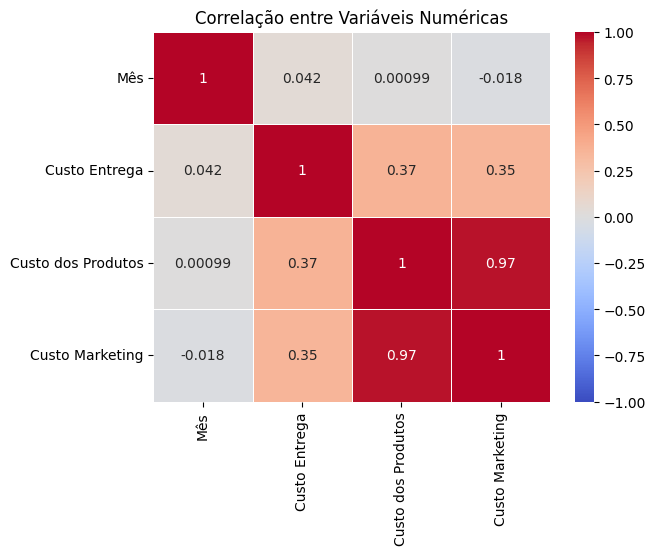

In [ ]:
#Criando um mapa de calor para melhor visualização
numeric_values = case_df.select_dtypes(include=['number'])
sns.heatmap(numeric_values.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.6)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

1. **Custo dos Produtos / Custo Marketing** = 0.97
2. **Custo dos Produtos / Custo Entrega** = 0.37
3.  **Custo Marketing / Custo Entrega** = 0.35

### Investigando o impacto das relações

In [ ]:
cat_grouped = case_df.groupby('Categoria')[['Custo Entrega', 'Custo dos Produtos', 'Custo Marketing']].mean().sort_values(by=['Custo Entrega', 'Custo dos Produtos','Custo Marketing'],ascending=False).round(2)
print(cat_grouped.nlargest(columns='Custo Entrega', n=5))
print(cat_grouped.nsmallest(columns='Custo Entrega', n=5))

              Custo Entrega  Custo dos Produtos  Custo Marketing
Categoria                                                       
TANQUINHO       19442394.95         37100915.31       7082558.93
CHURRASCO        8897384.62            91408.00        293266.77
SMARTPHONE       6076185.68         38948853.15       7683598.39
REFRIGERADOR     4705456.09          8058888.80       1883068.03
TV               4320326.76         17638929.13       3472717.45
                      Custo Entrega  Custo dos Produtos  Custo Marketing
Categoria                                                               
ANIMAIS                        0.00                0.73             0.22
CAMERAS/FILMADORAS             0.08                0.23             0.07
ACESSORIOS NOTEBOOK           11.26                0.46             0.20
ACESSÓRIOS TELEFONIA          33.19               24.64             6.91
PISCINA                       37.85               26.82            11.77


A tabela da média de gastos agrupado por categorias prova a veracidade da correlação calculada anteriormente; nela podemos verificar que quanto maior o gasto com entrega maior o gasto com o produto.


Os produtos com maior custo de entrega são em sua maioria eletrodomésticos,possivelmente pelo fato de serem mais pesados e maiores em área, visto valores de frete geralmente são proporcionais à **distância** x **peso** x **área**.
Uma opção é aumentar o valor de venda e simultaneamente aumentar a propaganda em cima deles, garantindo uma saída maior e consequentemente, a lucratividade.

# Considerações Finais


Primeiramente, é essencial pensarmos no contexto dessa baixa de rentabilidade; além dos dados já vistos, é interessante considerar fatores externos, como já mencionado na questão dos valores de entregas. Uma consequência do custo de entrega muito alto é que para manter rentabilidade será necessário aumentar o valor das mesmas, o que pode acabar diminuindo o interesse de compra dos clientes. Uma alternativa à isso é incentivar a compra de mais de um produto por vez, por exemplo, diminuindo o gasto de combustível por venda. Isso pode ser feito por meio de promoções de descontos progressivos, etc.


Outro fato importante a ser lembrado é a diminuição dos gastos com marketing; com os custos de entrega aumentando, a quantidade de vendas se manter estável não é o suficiente, logo um aumento em investimento para aumentar a base de clientes e o número de vendas é essencial. Aqui existem *n* possíveis métodos, como monitoramento de conversão de cliques para vendas, segmentação de clientes para propagandas mais eficazes, etc. A coleta desses dados geraria uma nova análise para entender melhor o que fazer e é um ótimo próximo passo.